In [1]:
# To run this notebook you have to install cloc by typing
# sudo apt install cloc
# on linux systems. For windows systems see here: 
# https://github.com/AlDanial/cloc#apt-get
import yaml
import pandas as pd

import matplotlib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.patches as mpatches

from pathlib import Path
from matplotlib.ticker import FuncFormatter

import warnings

warnings.filterwarnings("ignore", "This figure includes Axes that are not compatible")

In [2]:
plt.style.use("../../../docs/_static/respy.mplstyle")

In [3]:
# Call cloc and write result to yaml files
!cloc --yaml --out=cloc_code.yaml --read-lang-def=cloc_lang_def.txt --exclude-dir=tests,development ../../../
!cloc --yaml --out=cloc_tests.yaml ../../../respy/tests ../../../development/testing ../../../development/modules

     145 text files.
     120 unique files.                              
      57 files ignored.
Wrote cloc_code.yaml
      36 text files.
      31 unique files.                              
      17 files ignored.
Wrote cloc_tests.yaml


In [4]:
# load results
with open('cloc_code.yaml', 'r') as y:
    code = yaml.safe_load(y)
    
with open('cloc_tests.yaml', 'r') as y:
    tests = yaml.safe_load(y)

# store the relevant results in a DataFrame
code = pd.DataFrame.from_dict(code).T
code = code[['code', 'comment', 'blank']]
code = code.loc[['Python', "RestructuredText"]]

tests = pd.DataFrame.from_dict(tests).T
tests = tests[['code', 'comment', 'blank']]
tests = tests.loc[['Python']]
tests.rename(index={'Python': 'Python Test Code'}, inplace=True)

# stack the datasets
plot_data = pd.concat([code, tests], axis=0)
plot_data = plot_data.loc[['Python', 'Python Test Code', "RestructuredText"]]

# take the cumsum to make a stacked bar graph
plot_data = plot_data.cumsum(axis=1)

# Last fixes
data = plot_data.drop(columns="blank").rename(index={"RestructuredText": "Documentation"}, columns={"code": "Code", "comment": "Comment"})

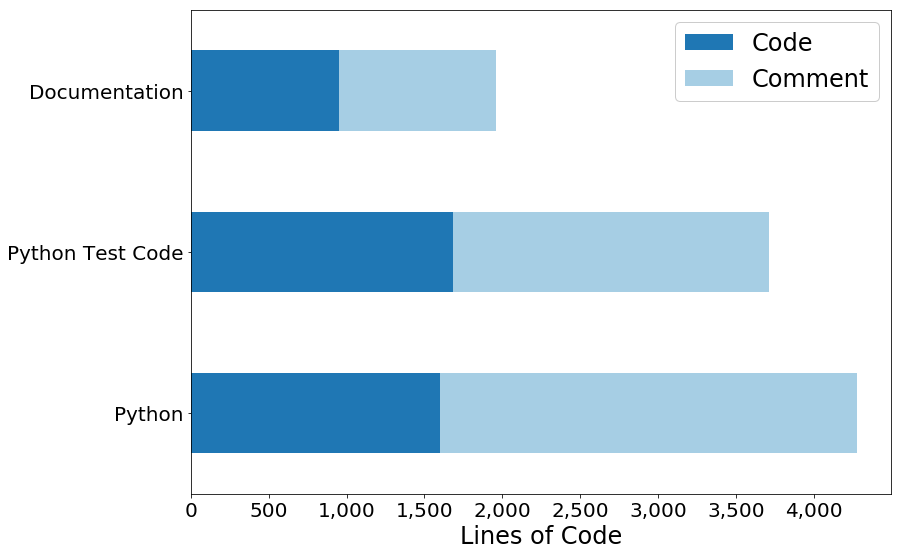

In [9]:
# Initialize the matplotlib figure
f, ax = plt.subplots()

# get the names of some colors
light_blue = plt.cm.get_cmap("Blues")(0.35)

# Plot the bars, order is important!
data.plot.barh(stacked=True, ax=ax, color=["C0", light_blue])

# Style the labels
ax.set_xlabel('Lines of Code')
ax.xaxis.set_major_formatter(FuncFormatter(lambda x, p: format(int(x), ",")))

plt.savefig("lines_of_code.png")

In [6]:
Path("cloc_code.yaml").unlink()
Path("cloc_tests.yaml").unlink()